## Scikit-learn
Another Python module that is very useful for data analysis and exploration is scikit-learn. This module contains statistical, machine learning, and related methods, including different types of regression and clustering.  
In this notebook, you can use scikit-learn to explore the Titanic data we've worked on this week.

In [5]:
# first, let's import scikit-learn and our dataset
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

# import titanic_cleaned.csv using pandas here
titanic = pd.read_csv('titanic_cleaned.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
0,0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


One of the most basic ways of analyzing you data is using regression. Statsmodels has a pretty simple linear regression method.

In [6]:
X = titanic[['Age', 'Pclass']]  # this syntax lets us select multiple columns from the dataframe
y = titanic['Fare']

model = linear_model.LinearRegression()  # instantiate a linear model
model.fit(X, y)  # fit the model betas
y_predicted = model.predict(X)  # predict y from X
r2 = r2_score(y, y_predicted)  # calculate model R-squared
print(f'R-squared is {r2}')

R-squared is 0.30983110915975454


That is a lot of information, but as you can see, the R-squared isn't super great. Can you add some more predictors?

In [14]:
# think about which predictors might be most informative and add them to X, then run the model again
X = titanic[['Age']] 
y = titanic['Fare']
model.fit(X,y)
y1_predicted = model.predict(X)
r21 = r2_score(y,y1_predicted)
# then check the R-squared in the model summary
print(f'R-squared is {r21}')
# summary(model)

R-squared is 0.007850752676197614


Of course the really interesting thing to predict would be survival. This is a binary variable, so we want to use logistic regression.  
The logistic regression method in sklearn is conveniently called `linear_models.LogisticRegression()`. Use it now to construct a good model of survival.  

__Hint:__ Use `pd.get_dummies()` to turn categorical columns into dummy coded columns.  

In [16]:
y = pd.get_dummies(titanic['Survived'])['yes']
# construct your own X variable with predictors here
X = titanic[['Age','Pclass']]
# do the regression using the linear regression code above (but replacing the model type for logistic regression)
model1 = linear_model.LogisticRegression()
model1.fit(X,y)
y2_predicted = model1.predict(X)
r2 = r2_score(y,y2_predicted)
# and print the R-squared
print(f'R-squared is {r2}')

R-squared is -0.24781956498446367


Turns out it's still really hard to predict who survived, but remember: Doing Titanic stats > watching the movie.  

Now explore the scikit-learn documentation to see what learning algorithms are in there. Play around with K-means and Nearest Neighbor clustering or Naive Bayes classifiers and this dataset if you have time. You might be able to get better predictions for the Titanic data than with simple regression models.

[[22.          3.        ]
 [38.          1.        ]
 [26.          3.        ]
 ...
 [29.69911765  3.        ]
 [26.          1.        ]
 [32.          3.        ]]


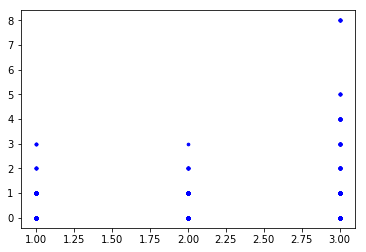

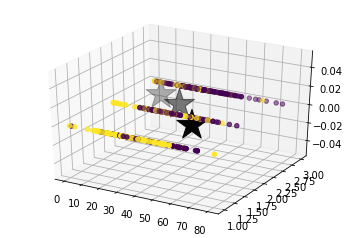

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
import matplotlib as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

f1 = titanic['Age'].values
f2 = titanic['Pclass'].values
f3 = titanic['SibSp'].values
X = np.array(list(zip(f1, f2)))
Y = np.array(list(zip(f1,f3)))
print(X)
# plt.pyplot.scatter(f1,f2,c='black',s=7)
# plt.pyplot.scatter(f1,f3,c='red',s=8)
plt.pyplot.scatter(f2,f3,c='blue',s=7)
# sns.scatterplot(f1, f2, data=X)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
fig = plt.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=1000)